In [ ]:
# First install the packages
!pip install pyscf                 # for method='pyscf`
!pip install openfermionpyscf      # for method='openfermion`
!pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 38.7 MB/s eta 0:00:00
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=b44852b63f391223d098599e1f96e339db67f57660746df8b4e0533a8caaad98
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.1 MB/s eta 0:00:00


#Group Name: Ufscarros#

Participants:
Eduardo Marsola do Nascimento; edunasci1975@gmail.com; 183.578.058-09 \
Nicolas Cenedesi Silveira; nicolas.cenedesi@gmail.com; 503.559.518-86 \
Pedro Marques Pontes; pmarquespontes@gmail.com; 449.094.218-40 \
Luís Eduardo Santos de Vasconcelos Penante;Dudusvpenanteluis@gmail.com; 107.035.224-18 \
Ivan Augusto Vicentin; ivanav.dp@gmail.com; 469.379.078-85 \
 \

##Exercise 2##

In [ ]:
import pennylane as qml
from pennylane import numpy as pnp

Number of qubits: 4
Qubit Hamiltonian
-0.042072551947439224 * I(0) + 0.1777135822909176 * Z(0) + 0.1777135822909176 * Z(1) + 0.17059759276836803 * (Z(0) @ Z(1)) + -0.2427450126094144 * Z(2) + 0.12293330449299361 * (Z(0) @ Z(2)) + 0.16768338855601356 * (Z(1) @ Z(2)) + 0.044750084063019925 * (Y(0) @ X(1) @ X(2) @ Y(3)) + -0.044750084063019925 * (Y(0) @ Y(1) @ X(2) @ X(3)) + -0.044750084063019925 * (X(0) @ X(1) @ Y(2) @ Y(3)) + 0.044750084063019925 * (X(0) @ Y(1) @ Y(2) @ X(3)) + -0.2427450126094144 * Z(3) + 0.16768338855601356 * (Z(0) @ Z(3)) + 0.12293330449299361 * (Z(1) @ Z(3)) + 0.1762766139418181 * (Z(2) @ Z(3))
[1 1 0 0]
0.3333333333333333 * (X(0) @ X(1)) + 0.3333333333333333 * (X(0) @ X(2)) + 0.3333333333333333 * (X(0) @ X(3)) + 0.3333333333333333 * (X(0) @ X(4)) + 0.3333333333333333 * (X(0) @ X(5)) + 0.3333333333333333 * (X(1) @ X(2)) + 0.3333333333333333 * (X(1) @ X(3)) + 0.3333333333333333 * (X(1) @ X(4)) + 0.3333333333333333 * (X(1) @ X(5)) + 0.3333333333333333 * (X(2) @ X(3)) 

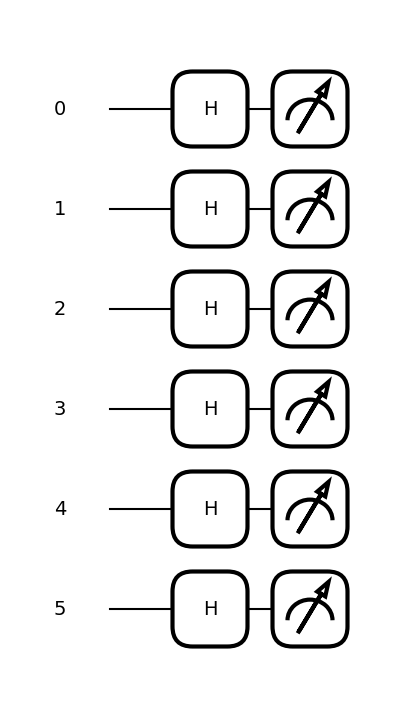

In [ ]:
# fazer a simulação de 2 atomos de hidrogênio
symbols  = ["H","H"]
coordinates = pnp.array([[0.0, 0.0, -0.6614], [0.0, 0.0, 0.6614]])

# Build the molecular Hamiltonian (in second-quantized form and mapped to qubits via Jordan-Wigner transformation)
molecule = qml.qchem.Molecule(symbols, coordinates)
H, qubits = qml.qchem.molecular_hamiltonian(molecule)
print("Number of qubits: {:}".format(qubits))
print("Qubit Hamiltonian")
print(H)


# Create the Hartree-Fock initial state for the molecule

electrons = 2
orbitals = qubits
hf = qml.qchem.hf_state(electrons,orbitals)
print(hf)



#Define variational circuit that prepares ansatze
def circuit_H2_VQE(param, wires):
    #Prepares HF basis state in the circuit to initialize the circuit
    qml.BasisState(hf, wires=wires)
    #Parametrize coupling between HF state and doubly-excited state
    qml.DoubleExcitation(param, wires=[0, 1, 2, 3])




n = 6
num_wires = n
Xs=0
Zs=0
for i in range (n):
  for j in range (i+1,n):
    Xs += 1/3*((qml.PauliX(wires=i))@(qml.PauliX(wires=j)))

  Zs += qml.PauliZ(wires=i)

hamiltoniano = Xs - Zs
print(hamiltoniano)

#define device
dev = qml.device("default.qubit", wires=num_wires) # Quando você cria o dispositivo com qml.device(), você especifica em qual backend/qubit o circuito será executado.
@qml.qnode(dev)
def circuit():
  # Initial state
  # qml.BasisState([0,0,0], wires = [0,1,2]) # aqui, estamos definindo todas os 3 qubits definidos (n=3), no estado |0>
  for i in range(num_wires):
    qml.Hadamard(wires = i)
  # Return a measurement - aqui, devemos obter o hamiltoniano como retorno
  return qml.expval(hamiltoniano)
#estamos falando sobre o valor esprado do hamiltoniano pois devemos realizar as medidas dos qubits (onde dependendo dos gates operator, podemos possuir diversos possivis valor após a medição do qubit)
qml.draw_mpl(circuit, decimals = 2)();

# print(H3data.hf_state) essa função printa os estados de cada um dos qubits a partir dos dados contidos em H3data
# print(H3data.hamiltonian) -  o que todos esses números representam
result = circuit()
print(f"Valor da expectativa do Hamiltoniano: {result}")